Mounted at /content/drive


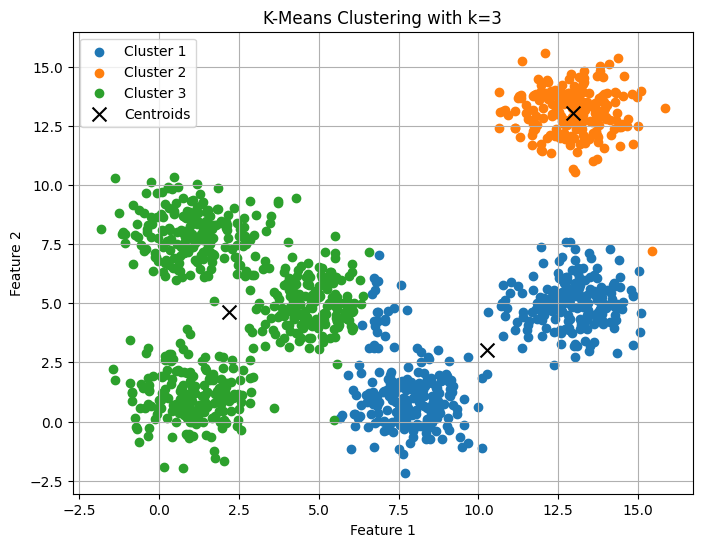

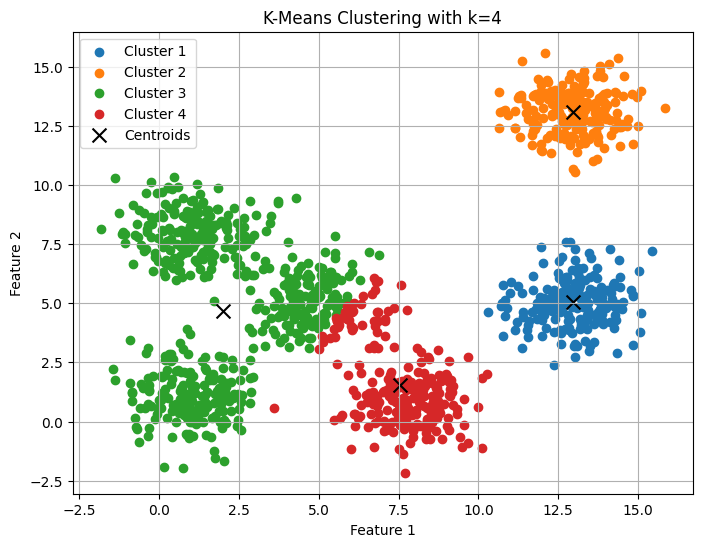

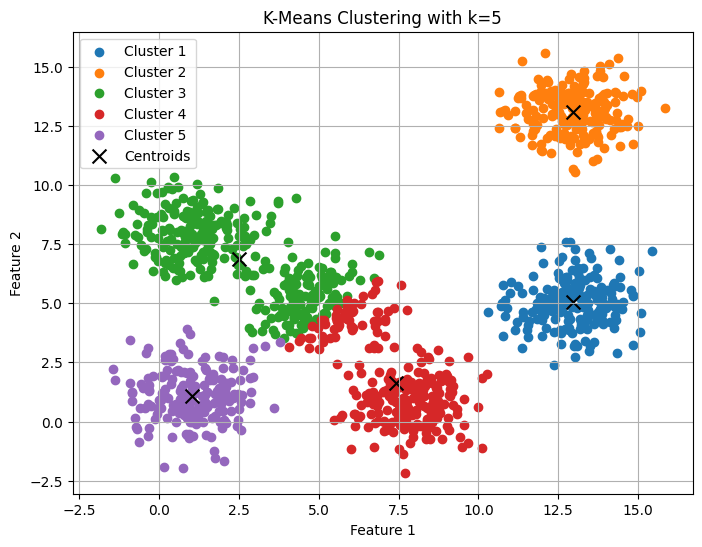

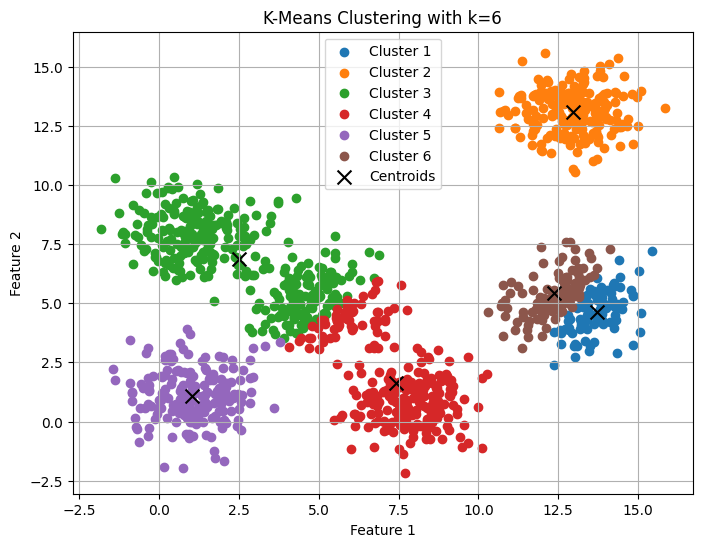

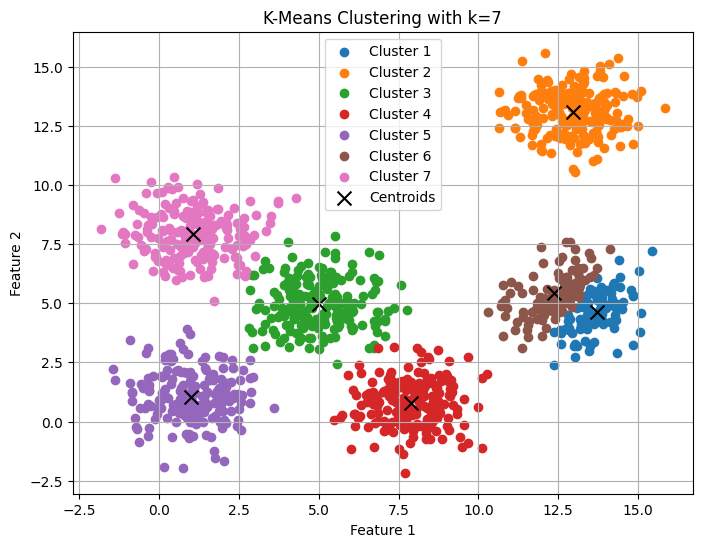

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/My Drive/data.csv'
df = pd.read_csv(data_path)
data = df.to_numpy()[:, :2]

def calculate_distance(a, b):
    """Calculate Euclidean distance between two points."""
    return np.sqrt(np.sum((a - b) ** 2))

def k_means_clustering(data, k, max_iterations=100):
    """K-Means Clustering implementation."""
    np.random.seed(42)
    random_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[random_indices]

    for iteration in range(max_iterations):
        distances = np.array([[calculate_distance(point, centroid) for centroid in centroids] for point in data])
        clusters = np.argmin(distances, axis=1)

        new_centroids = np.array([data[clusters == i].mean(axis=0) if len(data[clusters == i]) > 0 else centroids[i] for i in range(k)])

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

def visualize_clusters(data, clusters, centroids, k):
    """Visualizing the clusters and centroids."""
    plt.figure(figsize=(8, 6))
    for i in range(k):
        cluster_points = data[clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# K-Means for k = 3, 4, 5, 6, 7
for k in range(3, 8):
    clusters, centroids = k_means_clustering(data, k)
    visualize_clusters(data, clusters, centroids, k)
